### Урок 3. Логистическая регрессия. Log Loss

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=2) 

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64) # квалификация репетитора

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1]) # подходит или нет репетитор

Если предсказывать с помощью линейной регрессии, то могут появляться такие числа:   

-1, -0.2, 1.3, 0.05 ...

p = [0, 1]

$odds = \frac{p}{1 - p} = \frac{p_1}{p_0}$

In [4]:
0.5 / (1 - 0.5)

1.0

In [5]:
0.01 / (1 - 0.01)

0.010101010101010102

In [6]:
0.9999 / (1 - 0.9999)

9999.0000000011

In [7]:
p = 1e-10
np.log(p / (1 - p))                       

-23.025850929840455

In [8]:
p = 0.999
np.log(p / (1 - p))

6.906754778648553

$$\vec{w}X = \ln\Big(\frac{\vec{p}}{1 - \vec{p}}\Big)$$
$$\vec{p}=\frac{1}{1+\exp{(-\vec{w}X)}}$$

In [9]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [10]:
y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [11]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st[2, :]

array([-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
       -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735])

$$Logloss=-y \ln(p) - (1-y)\ln(1-p)$$

In [12]:
def calc_logloss(y, y_pred):
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [13]:
# Пример применения
y_true = 1
y_pred = 0.00001
calc_logloss(y_true, y_pred)

11.512925464970229

In [14]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [15]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

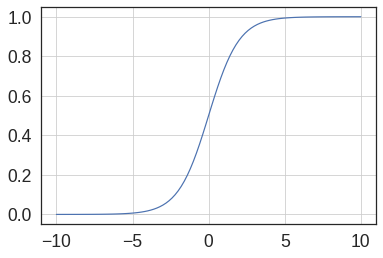

In [16]:
probabilities = sigmoid(z)
plt.plot(z, probabilities);
plt.grid();

### Logistic Regression

In [17]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        
        
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        # y_pred = np.dot(w, X)
        # err = calc_mse(y, y_pred)
    
    
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [18]:
w = eval_LR_model(X_st, y, iterations=1000, alpha=1e-2)

100 [ 0.25769171 -0.68297243  0.68841418  1.2405903 ] 0.5908596023453088
200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099053
300 [ 0.06257746 -0.68605867  0.85181735  1.21283095] 0.5560473747533587
400 [-0.00887935 -0.68415387  0.90713736  1.22443854] 0.5476800278385013
500 [-0.0701621  -0.68661758  0.94984062  1.24404686] 0.5416765996151559
600 [-0.1239972  -0.69202069  0.98318257  1.26924759] 0.536984186497779
700 [-0.17239277 -0.69933957  1.00953865  1.29824779] 0.5330427663756572
800 [-0.21681092 -0.7078635   1.03062761  1.32973537] 0.5295551503580799
900 [-0.25830834 -0.71709934  1.04769231  1.36276535] 0.5263621224044185
1000 [-0.29764618 -0.72670545  1.061634    1.39666497] 0.5233765331724747


### Домашние задания

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - np.clip).  

In [19]:
def calc_logloss(y, y_pred):
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

$y\_pred \neq 0 \\
y\_pred \neq 1$

In [20]:
def calc_logloss1(y: np.ndarray, y_pred: np.ndarray, bias=1e-8 ):
    y_pred[y_pred==1] -= bias
    y_pred[y_pred==0] += bias
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [21]:
def eval_LR_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
           
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [22]:
def eval_LR_model1(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss1(y, y_pred)
        
        w -= alpha * (1/n * np.dot((y_pred - y), X.T))
        #if i % (iterations / 10) == 0:
            #print(i, w, err)
    return {'w': w, 'err':err, 'alpha':alpha}

In [23]:
w1 = eval_LR_model1(X_st, y, iterations=1000, alpha=1e-2)

2. Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [24]:
import pandas as pd
alphas = np.logspace(1,4,1000)
w_err_alphas = [eval_LR_model1(X_st, y, iterations=1000, alpha=alpha_) for alpha_ in alphas]
w_err_alphas_df = pd.DataFrame(w_err_alphas)

/home/oleg_rev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


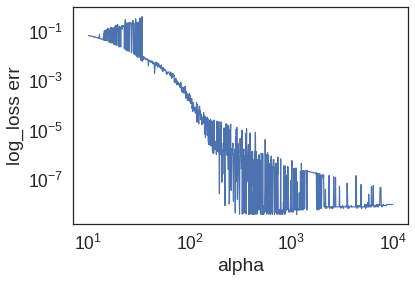

In [30]:
plt.xscale('log')
plt.yscale('log')
plt.ylabel('log_loss err')
plt.xlabel('alpha')
plt.plot(w_err_alphas_df['alpha'], w_err_alphas_df['err'])

In [26]:
alpha_min_loglos = w_err_alphas_df['alpha'].loc[w_err_alphas_df['err']==w_err_alphas_df['err'].min()]
alpha_min_loglos=float(alpha_min_loglos)
alpha_min_loglos

823.9785684528512

In [27]:
df = pd.DataFrame(eval_LR_model1(X_st, y, iterations=1000, alpha=alpha_min_loglos))
weights = np.array(df['w'])
weights

/home/oleg_rev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([-4869.35960919,  -643.05239203, -1069.26678751,  4390.57322605])

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred_proba).


In [28]:
def calc_pred_proba(w, X):
    return sigmoid(np.dot(w,X))

In [29]:
y_pred_prob = calc_pred_proba(weights, X_st)
y_pred_prob 

array([4.90008805e-033, 1.42545654e-224, 1.00000000e+000, 8.35754900e-129,
       1.00000000e+000, 4.57019215e-041, 1.00000000e+000, 2.01757474e-169,
       1.00000000e+000, 1.00000000e+000])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются веса, которые уже посчитаны функцией eval_LR_model и X, на выходе - массив y_pred).


In [57]:
def calc_pred(w, X, threshold_pred=0.5):
    y_pred = calc_pred_proba(w, X)
    y_pred[y_pred < threshold_pred] = 0
    y_pred[y_pred >= threshold_pred] = 1
    return y_pred

In [61]:
y_pred=calc_pred(weights, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.


In [68]:
def calc_accuracy(actual, predicted):
    return (100.0 - np.mean(np.abs(predicted - actual)*100.0))
    

def confusion(actual, predicted):
    """
     Функция принимает на вход актуальные значения и предсказанные,
     строит матрицу ошибок в виде словаря:
        {'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN}.
    """
    TP=np.sum(np.logical_and(predicted==1, actual==1))
    FP=np.sum(np.logical_and(predicted==1, actual==0))
    FN=np.sum(np.logical_and(predicted==0, actual==1))
    TN=np.sum(np.logical_and(predicted==0, actual==0))
    return {'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN}

def get_dict_precision_recall_TPR_FPR(conf_m):
    """
    Функция принимает на вход матрицу ошибок в виде словаря с ключами:
        {'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN}.
    Функция возвращает значения метрик в виде словаря:
        {'precision': precision,
        'recall': recall,
        'TPR': TPR,
        'FPR': FPR,
        'f1_score': f1_score}.
    """
    TPR = conf_m['TP']/(conf_m['TP'] + conf_m['FN'])
    FPR = conf_m['FP']/(conf_m['FP'] + conf_m['TN'])
    precision = conf_m['TP']/(conf_m['TP'] + conf_m['FP'])
    recall = conf_m['TP']/(conf_m['TP'] + conf_m['FN'])
    f1_score= 2*precision*recall/(precision+recall)
    return {'precision': precision, 'recall': recall, 'TPR': TPR, 'FPR': FPR, 'f1_score': f1_score}

In [69]:
calc_accuracy(y, y_pred)

100.0

In [70]:
conf_m = confusion(y, y_pred)
conf_m

{'TP': 5, 'FP': 0, 'FN': 0, 'TN': 5}

In [71]:
get_dict_precision_recall_TPR_FPR(conf_m)

{'precision': 1.0, 'recall': 1.0, 'TPR': 1.0, 'FPR': 0.0, 'f1_score': 1.0}

6. Могла ли модель переобучиться? Почему?


In [78]:
weights

array([-4869.35960919,  -643.05239203, -1069.26678751,  4390.57322605])

После минимизации logloss значения весов имеют большие значения.
Выборка очень малой длины .
Это привело к переобучению.

7. *Создайте функции eval_LR_model_l1 и eval_LR_model_l2 с применением L1 и L2 регуляризации соответственно.

In [89]:
def sign(x):
    if x:
        return 1 if x > 0 else -1
    else:
        raise ValueError('Производная модуля в нуле не существует')

        
def sign_array(array):
    return np.array([sign(_) for _ in array])


def eval_LR_model_l1(X, y, iterations, alpha=1e-4, lambda_=1):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):        
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        
        err = calc_logloss1(y, y_pred)
        
        w -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * sign_array(w))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w


def eval_LR_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):        
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        
        err = calc_logloss1(y, y_pred)
        
        w -= alpha * (1/n * np.dot((y_pred - y), X.T)  + 2 * lambda_ * w)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w
